In [27]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
boston = pd.read_csv('HousingData.csv')

In [4]:
y = boston['MEDV']

In [5]:
mvr = smf.ols(' y ~ CRIM + ZN + CHAS + NOX', data = boston)

In [6]:
mvr_fit = mvr.fit()

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
print(mvr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     51.09
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           2.37e-35
Time:                        21:01:32   Log-Likelihood:                -1541.7
No. Observations:                 447   AIC:                             3093.
Df Residuals:                     442   BIC:                             3114.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1380      2.258     14.673      0.0

In [9]:
corr_matrix = boston.corr()


In [10]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.40,-0.05,0.42,-0.22,0.35,-0.37,0.62,0.58,0.28,-0.38,0.44,-0.39
ZN,-0.19,1.00,-0.53,-0.04,-0.51,0.32,-0.56,0.66,-0.31,-0.31,-0.41,0.17,-0.41,0.37
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.73,0.39,-0.36,0.59,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.08,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.42,-0.51,0.76,0.08,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.58,-0.43
RM,-0.22,0.32,-0.39,0.10,-0.30,1.00,-0.25,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.56,0.64,0.08,0.73,-0.25,1.00,-0.74,0.46,0.51,0.27,-0.28,0.60,-0.39
DIS,-0.37,0.66,-0.71,-0.09,-0.77,0.21,-0.74,1.00,-0.49,-0.53,-0.23,0.29,-0.49,0.25
RAD,0.62,-0.31,0.60,0.00,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.48,-0.38
TAX,0.58,-0.31,0.73,-0.03,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [11]:
corr_matrix[corr_matrix<.6] = 0

In [12]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,0.00,0.60,0.73,0.00,0.00,0.00,0.00
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,0.00,0.61,0.67,0.00,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00
DIS,0.00,0.66,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
RAD,0.62,0.00,0.60,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00,0.00
TAX,0.00,0.00,0.73,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00,0.00


<Axes: >

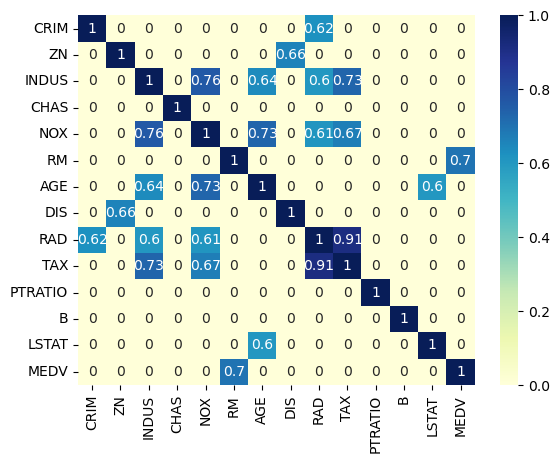

In [13]:
sns.heatmap(corr_matrix, annot = True, cmap ='YlGnBu')

In [14]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,NaN,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


In [15]:
smf.ols?

Signature: smf.ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
Docstring:
Create a Model from a formula and dataframe.

Parameters
----------
formula : str or generic Formula object
    The formula specifying the model.
data : array_like
    The data for the model. See Notes.
subset : array_like
    An array-like object of booleans, integers, or index values that
    indicate the subset of df to use in the model. Assumes df is a
    `pandas.DataFrame`.
drop_cols : array_like
    Columns to drop from the design matrix.  Cannot be used to
    drop terms involving categoricals.
*args
    Additional positional argument that are passed to the model.
**kwargs
    These are passed to the model with one exception. The
    ``eval_env`` keyword is passed to patsy. It can be either a
    :class:`patsy:patsy.EvalEnvironment` object or an integer
    indicating the depth of the namespace to use. For example, the
    default ``eval_env=0`` uses the calling namespace. If you wish
   

In [16]:
from sklearn.linear_model import Ridge

In [17]:
y = boston['MEDV']

In [18]:
X = boston['RM'].values.reshape(-1,1)

In [19]:
model = Ridge()

In [21]:
model.fit(X,y)

Ridge()

In [24]:
X_test = np.arange( X.min(), X.max(), 5).reshape(-1,1)

In [34]:
y_predict = model.predict(X_test)

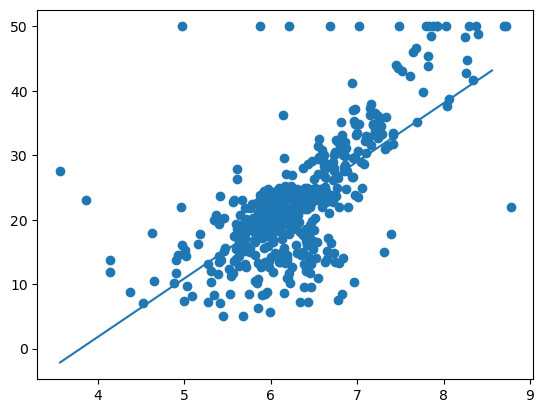

In [36]:
plt.plot(X_test.flatten(),y_predict)
plt.scatter(X.flatten(),y)

plt.show()

In [31]:
X_test

array([[3.561],
       [8.561]])

In [32]:
X_test.flatten()

array([3.561, 8.561])

array([25.16518685, 23.76906216, 30.69529113, 28.99999687, 30.35079283,
       23.85065386, 20.06117256, 21.51169172, 16.60712382, 19.98864661,
       23.37016939, 20.03397533, 18.94608596, 19.49003065, 20.82269512,
       18.44747   , 19.36311022, 19.86172618, 15.02061849, 17.47743531,
       16.05411339, 19.63508256, 21.23971938, 18.25708936, 19.26338703,
       16.31701999, 18.25708936, 20.37847363, 24.43992727, 26.06269558,
       17.35051489, 20.60511725, 19.49909639, 17.24172595, 20.82269512,
       19.34497873, 18.51093021, 18.59252192, 19.64414831, 25.34650174,
       29.23570623, 26.93300707, 21.48449449, 21.86525576, 20.57792001,
       17.0694768 , 18.01231425, 20.22435597, 14.50387104, 16.34421722,
       19.61695107, 20.99494427, 24.58497918, 19.93425214, 18.93702022,
       31.2754988 , 23.42456386, 27.35003133, 21.26691661, 19.29058426,
       17.60435574, 19.64414831, 24.08636322, 26.86048111, 29.96096581,
       22.5814496 , 18.02138   , 18.84636277, 16.27169127, 18.90